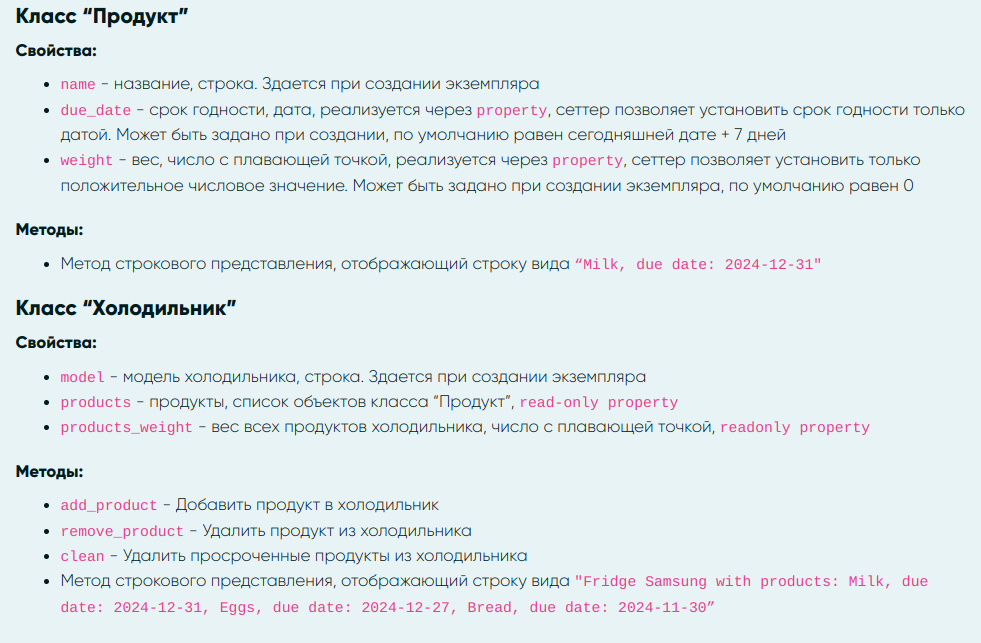


In [ ]:
from datetime import date, timedelta


class Product:
    def __init__(
        self,
        name: str,
        due_date: date = date.today() + timedelta(days=7),
        weight: float = 0.0,
    ):
        self.name = name
        self.due_date = due_date
        self.weight = weight

    @property
    def due_date(self):
        return self.__due_date

    @due_date.setter
    def due_date(self, new_date):
        if not isinstance(new_date, date):
            raise TypeError

        self.__due_date = new_date

    @property
    def weight(self):
        return self.__weight

    @weight.setter
    def weight(self, new_weight):
        if not isinstance(new_weight, float):
            raise TypeError

        if new_weight < 0:
            raise ValueError

        self.__weight = new_weight

    def __str__(self):
        return f"{self.name}, due date: {self.due_date}"


class Fridge:
    def __init__(self, model: str):
        self.model = model
        self.__products = []
        self.__products_weight = 0.0

    @property
    def products(self):
        return self.__products.copy()

    @property
    def products_weight(self):
        return self.__products_weight

    def add_product(self, new_product):
        if not isinstance(new_product, Product):
            raise TypeError

        self.__products.append(new_product)
        self.__products_weight += new_product.weight

    def remove_product(self, del_product):
        if not isinstance(del_product, Product):
            raise TypeError

        if del_product not in self.__products:
            raise ValueError

        self.__products.remove(del_product)
        self.__products_weight -= del_product.weight

    def clean(self):
        for product in self.__products:
            if product.due_date < date.today():
                self.remove_product(product)

    def __str__(self):
        return f"Fridge {self.model} with products: {','.join(str(p) for p in self.__products)}"


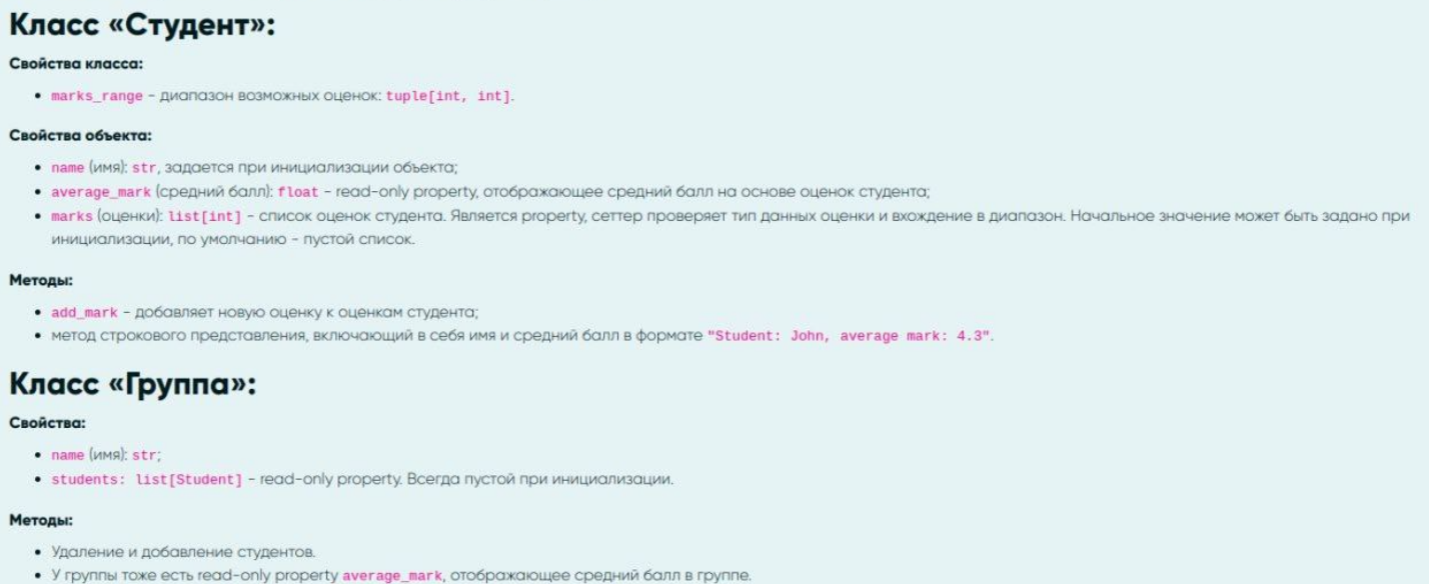

In [21]:
class Student:
    marks_range = ()

    def __init__(self, name, marks=[]):
        self.name = name
        self.__marks = marks

    @property
    def marks(self):
        return self.__marks

    @marks.setter
    def marks(self, new_marks):
        self.__marks = []

        for new_mark in new_marks:
            if not isinstance(new_mark, int):
                raise TypeError

            if not (self.marks_range[0] <= new_mark <= self.marks_range[1]):
                raise ValueError

            self.__marks.append(new_mark)

    @property
    def average_mark(self):
        if len(self.__marks) == 0:
            raise ZeroDivisionError
        else:
            return sum(self.__marks) / len(self.__marks)

    def add_mark(self, new_mark):
        if not isinstance(new_mark, int):
            raise TypeError

        if not (self.marks_range[0] <= new_mark <= self.marks_range[1]):
            raise ValueError

        self.__marks.append(new_mark)

    def __str__(self):
        return f"Student: {self.name}, average mark: {round(self.average_mark, 1)}"


class Group:
    def __init__(self, name):
        self.name = name
        self.__students = []

    @property
    def students(self):
        return [student.name for student in self.__students]

    @property
    def average_mark(self):
        if len(self.__students) == 0:
            raise ValueError

        return sum([i.average_mark for i in self.__students]) / len(self.__students)

    def add_student(self, new_student):
        if not isinstance(new_student, Student):
            raise TypeError

        self.__students.append(new_student)

    def delete_student(self, student):
        if not isinstance(student, Student):
            raise TypeError

        self.__students.remove(student)



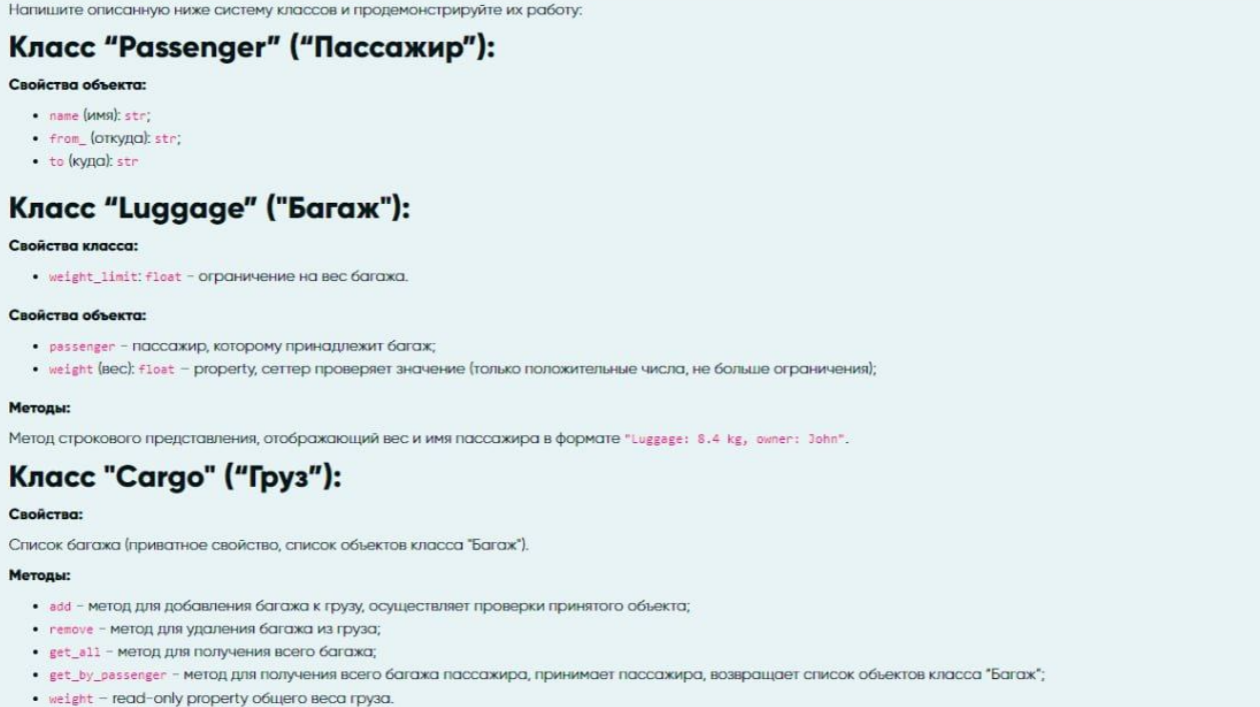

In [ ]:
class Passenger:
    def __init__(self, name: str, from_: str, to: str):
        self.name = name
        self.from_ = from_
        self.to = to


class Luggage:
    weight_limit = 0.

    def __init__(self, passenger: Passenger, weight: float):
        self.passenger = passenger
        self.__weight = weight

    @property
    def weight(self):
        return self.__weight
    
    @weight.setter
    def weight(self, new_weight):
        if not isinstance(new_weight, float):
            raise TypeError
        
        if not new_weight > 0.:
            raise ValueError
        
        if new_weight > self.weight_limit:
            raise ValueError
        
        self.__weight = new_weight

    def __str__(self):
        return f"Luggage: {self.__weight} kg, owner: {self.passenger.name}"


class Cargo:
    def __init__(self, luggage_list = []):
        self._luggage_list = luggage_list
        
    def add(self, new_luggage):
        if not isinstance(new_luggage, Luggage):
            raise TypeError
        
        self._luggage_list.append(new_luggage)

    def remove(self, luggage):
        if not isinstance(luggage, Luggage):
            raise TypeError
        
        self._luggage_list.remove(luggage)

    def get_all(self):
        return [luggage for luggage in self._luggage_list]
    
    def get_by_passenger(self, passenger):
        if not isinstance(passenger, Passenger):
            raise TypeError

        return [luggage for luggage in self._luggage_list if luggage.passenger == passenger]
    
    @property
    def weight(self):
        return sum([luggage.weight for luggage in self._luggage_list])


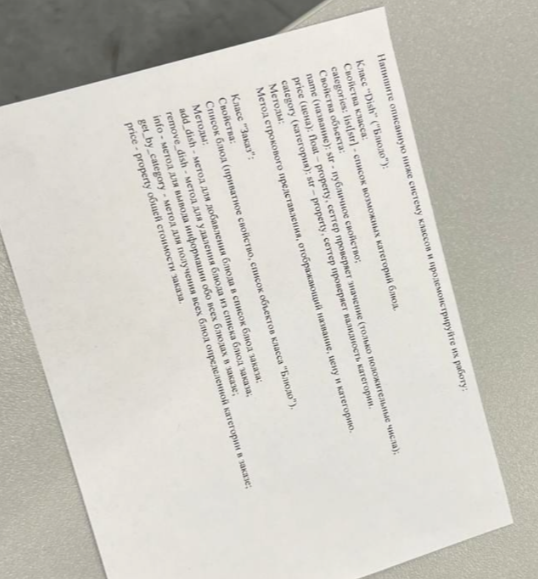

In [1]:
class Dish:
    categories = []

    def __init__(self, name: str, price: float, category: str):
        self.name = name
        self.__price = price
        self.__category = category

    @property
    def price(self):
        return self.__price

    @price.setter
    def price(self, new_price):
        if not isinstance(new_price, float):
            raise TypeError

        if new_price < 0:
            raise ValueError

        self.__price = new_price

    @property
    def category(self):
        return self.__category

    @category.setter
    def category(self, new_category):
        if new_category not in self.categories:
            raise TypeError

        self.__category = new_category

    def __str__(self):
        return f"Dish: {self.name}, price: {self.price}, category: {self.category}"


class Order:
    def __init__(self, order_list: list[Dish]):
        self._order_list = order_list

    def add_dish(self, new_dish):
        if not isinstance(new_dish, Dish):
            raise TypeError

        self._order_list.append(new_dish)

    def remove_dish(self, dish):
        if not isinstance(dish, Dish):
            raise TypeError

        self._order_list.remove(dish)

    def info(self):
        return [dish for dish in self._order_list]

    def get_by_category(self, category):
        if category not in Dish.categories:
            raise TypeError

        return [dish for dish in self._order_list if dish.category == category]

    @property
    def price(self):
        return sum([dish.price for dish in self._order_list])

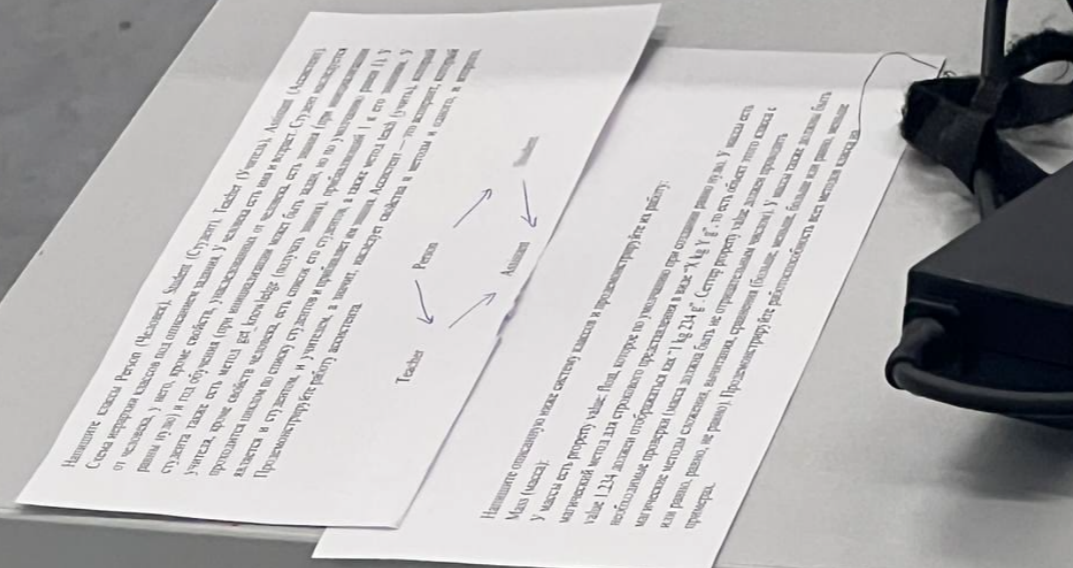

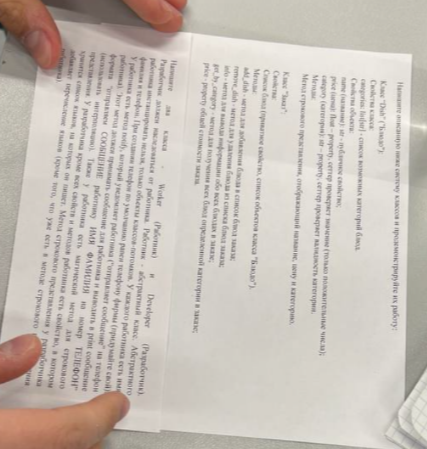

In [ ]:
class Passenger: 
    def __init__(self, name, from_, to):
        self.name = name
        self.from_ = from_
        self.to = to
        

class Luggage: 
    weight_limit = 0.
    
    def __init__(self, passenger, weight):
        self.passenger = passenger
        self.__weight = weight
    
    @property
    def weight(self):
        return self.__weight
    
    @weight.setter
    def weight(self, new_weight):
        if not isinstance(new_weight, float):
            raise TypeError
        
        if not (0. < new_weight <= self.weight_limit):
            raise ValueError
        
        self.__weight = new_weight
    
    def __str__(self):
        return f"Luggage: {self.__weight} kg, owner: {self.passenger}"
        

class Cargo: 
    __luggage_list = []
    
    def add(self, new_luggage):
        if not isinstance(new_luggage, Luggage):
            raise TypeError
            
        self.__luggage_list.append(new_luggage)
        
    def remove(self, luggage):
        if not isinstance(luggage, Luggage):
            raise TypeError
        
        self.__luggage_list.remove(luggage)
        
    
    def get_all(self):
        return self.__luggage_list
    
    def get_by_passenger(self, passenger):
        return [luggage for luggage in self.__luggage_list if luggage.passenger == passenger]
        
    @property
    def weight(self):
        if len(self.__luggage_list) == 0:
            raise ZeroDivisionError
        return sum([luggage.weight for luggage in self.__luggage_list]) / len(self.__luggage_list)



In [13]:
class Student: 
    marks_range = (0, 10)
    
    def __init__(self, name, marks = []):
        self.name = name
        self.__marks = marks
    
    @property
    def average_mark(self):
        if len(self.__marks) == 0:
            raise ValueError
            
        return sum([mark for mark in self.__marks]) / len(self.__marks)
        
    @property
    def marks(self):
        return self.__marks
    
    @marks.setter
    def marks(self, new_marks):
        if not all(isinstance(mark, int) for mark in new_marks):
            raise TypeError
        if not all(self.marks_range[0] <= mark <= self.marks_range[1] for mark in new_marks):
            raise ValueError
            
        self.__marks = list(new_marks)
    
    def add_mark(self, new_mark):
        if not isinstance(new_mark, int):
            raise TypeError
        
        if not (self.marks_range[0] <= new_mark <= self.marks_range[1]):
            raise ValueError
        
        self.__marks.append(new_mark)
    
    def __str__(self):
        return f"Student: {self.name}, average mark: {self.average_mark}"


class Group: 
    def __init__(self, name, students = []):
        self.name = name    
        self.__students = students
        
    @property
    def students(self):
        return self.__students
        
    def add_student(self, new_student):
        if not isinstance(new_student, Student):
            raise TypeError
            
        self.__students.append(new_student)
        
    def remove_student(self, student):
        if not isinstance(student, Student):
            raise TypeError
        
        if student not in self.__students:
            raise ValueError
            
        self.__students.remove(student)
        
    @property
    def average_mark(self):
        if not self.__students:
            return 0.0 
            
        total_marks = []
        
        for student in self.__students:
            total_marks.extend(student.marks)

        if not total_marks:
            return 0.0
        return round(sum(total_marks) / len(total_marks), 1)
        

st1 = Student("Oleg", [4, 4])
st2 = Student("Alicce", [5])
st3 = Student("Tom", [3, 2, 2])
g = Group("Z", [st1, st2, st3])
print(g.average_mark) 

3.3


In [15]:
class Person:
   def __init__(self, name, age):
       self.__name = name
       self.__age = age  

   def age_getter(self):
       return self.__age

   def age_setter(self, age):
       if 0 < age < 110:
           self.__age = age
       else:
           print("Недопустимый возраст")
        
   age_prop = property(age_getter, age_setter)  

tom = Person("Tom", 39)
tom.age_prop = 52
tom.age_prop


52

In [20]:
bool is bool

False